Modeling Biochemical Processes - Stochastic Simulation Algorithm
<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Stochastic Simulation Algorithm</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 421, Spring 2024
Instructor: Brian Munsky
Authors: Dr. Lisa Weber, Dr. Michael May, Joshua Cook, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



----------
## Learning Objectives for this Notebook:
--------------

After completing this notebook, students should:
* Be familiar with stochasticity and examples of stochasticity in biological systems.
* Be able to identify and set up stochiometery vectors and propensity functions for biological models.
* Be able to set up and use the stochastic simmulation algorithm
* Understand how reaction constants affect SSA trajectories
* Use stochastic simulations to create distributions for at specific time points for a model

# Introduction and Motivation

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎001.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎002.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎003.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎004.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎005.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎006.png)

# The Markov Description of Gene Regulation Dynamics.

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎007.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎008.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎009.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎010.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎011.png)

# The Stochastic Simulation Algorithm

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎012.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎013.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎014.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎015.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎016.png)

![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎017.png)

# Python Examples

In [1]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint

## Example 1 - Bursting Gene Expression
Define the parameters, stoichiometry matrix, and propensity functions for a simple example model. In this case we will examine the bursting gene expression model (Example 2 in the Notebook M5A.)

![alt text](Figures/StoichiometryAndPropensity_2023/Slide29.png)

### Stoichiometries and Propensity Functions

In [45]:
# Note - This code is copied exactly from the previous Module M5A.  We are going to use the same steps as
# before to define the model.  The only difference is that we are going to use the Gillespie algorithm to
# simulate the model instead of the ODE solver.

# Step 1: The number of species is 3:  'OFF', 'ON', 'Protein'
#         The initial conditions are:  x0 = [1, 0, 0]
#         The initial condition corresponds to 1 molecule of 'OFF' and 0 molecules of 'ON' and 'Protein'
#         The initial condition is defined as a 3 x 1 numpy array:
x0 = np.array([1, 0, 0])

# Step 2: The number of reactions is 4:
#         R1:  OFF -> ON
#         R2:  ON -> OFF
#         R3:  ON -> ON + Protein
#         R4:  Protein -> null

# Step 3: The stoichiometry matrix is a 3 x 4 matrix:
#         Rows correspond to species and columns correspond to reactions.
#         The matrix is defined as follows:
S = np.array([[-1, 1, 0, 0],
        [1, -1, 0, 0],
        [0, 0, 1, -1]])

# Step 4: Define the reaction rate parameters as a dictionary
pars = {'kon': 0.2, 'koff': 0.5, 'kP': 10, 'gam': 0.1}
def W(x,t,pars=pars):
  return np.array([[pars['kon']*x[0]],
                   [pars['koff']*x[1]],
                   [pars['kP']*x[1]],
                   [pars['gam']*x[2]]])


### Computing the time and type of the next reaction

In [46]:
# Let's define a simple function that computes the time of the next reaction given our propensity functions:
def next_time(x, t, pars):
    return -np.log(np.random.rand()) / np.sum(W(x, t, pars))

# Let's define a simple function that computes the index of the next reaction given our propensity functions:
def next_reaction(x, t, pars):
    Wx = W(x, t, pars)
    Wx_sum = np.sum(Wx)
    r = np.random.rand()
    i = 0
    W_sum = Wx[0]
    while W_sum / Wx_sum < r:
        i += 1
        W_sum += Wx[i]
    return i

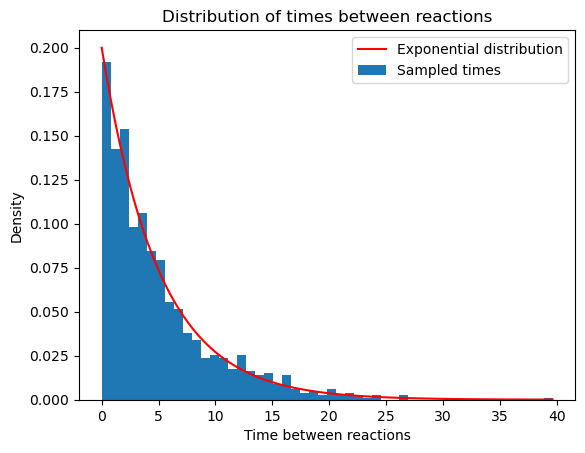

In [47]:
# Now that we defined that function, let's sample from it to get the distribution of times between reactions:

x0 = np.array([1, 0, 0])  # Initial conditions
times = []
for i in range(1000):
    times.append(next_time(x0, 0, pars))

# Plot the results of our samples as a histogram:
plt.hist(times, bins=50, density=True)
# Plot the analytical exponential distribution
t = np.linspace(0, max(times), 100)
lam = np.sum(W(x0, 0, pars))
plt.plot(t, lam*np.exp(-lam*t), 'r')

plt.xlabel('Time between reactions')
plt.ylabel('Density')
plt.title('Distribution of times between reactions')
plt.legend(['Exponential distribution', 'Sampled times'])
plt.show()

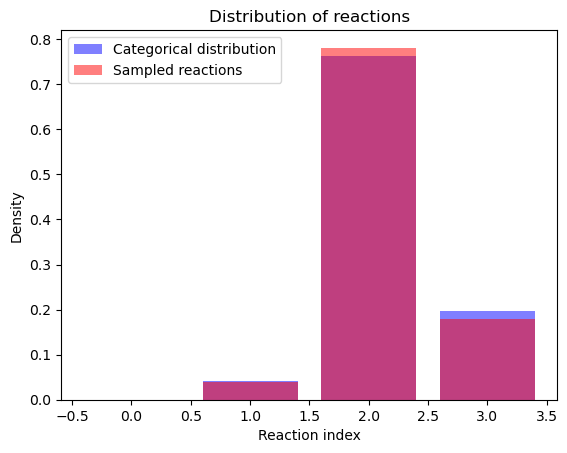

In [48]:
# Let's do the same for the categorical distribution of reactions:
x0 = np.array([0, 1, 23])  # Initial conditions
reactions = []
for i in range(1000):
    reactions.append(next_reaction(x0, 0, pars))

sampleHist = [sum([1 for i in reactions if i == j]) for j in range(4)]
# Plot the results of our samples as a bar plot:
plt.bar(range(4), sampleHist / np.sum(sampleHist), alpha=0.5, color='b')
truedist = (W(x0, 0, pars) / np.sum(W(x0, 0, pars))).flatten()
plt.bar(range(4), truedist, alpha=0.5, color='r')
plt.xlabel('Reaction index')
plt.ylabel('Density')
plt.title('Distribution of reactions')
plt.legend(['Categorical distribution', 'Sampled reactions'])
plt.show()

### Running the Gillespie Algorithm

In [70]:
# Now that we have codes that compute the next time and the next reaction, let's combine them
# to create the Gillespie algorithm. 

def gillespie0(x0, t0, tmax, S, pars, returnFullTraj = False):
    # Initialize the time and the state
    t = t0
    x = x0
    
    # Initialize the output (if requested)
    if returnFullTraj:
        times = [t0]
        states = [x0]
    
    # Run the simulation
    while t < tmax:
        # Compute the time of the next reaction
        tau = next_time(x, t, pars)
        t += tau
        
        # Exit the loop if the next reaction is beyond tmax
        if t > tmax:
            break
        
        # Compute the index of the next reaction
        i = next_reaction(x, t, pars)

        # Update the state
        x = x + S[:, i]
        
        # Append the results (if requested)
        if returnFullTraj:
            times.append(t)
            states.append(x)

    # Return the results
    if returnFullTraj:
        # Return the full trajectory
        return np.array(times), np.array(states)
    else:
        # Return only the final state
        return x

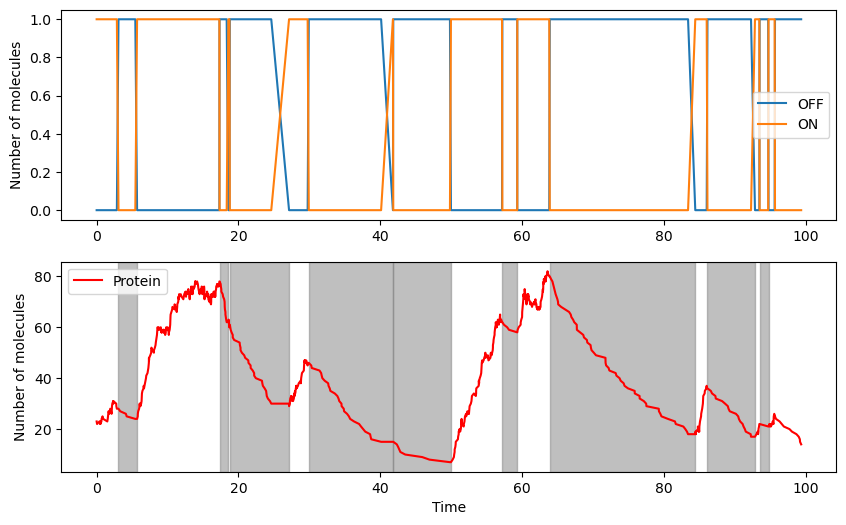

In [59]:
# Let's run the Gillespie algorithm for a long time and plot the results:
tmax = 100
times, states = gillespie0(x0, 0, tmax, S, pars, returnFullTraj=True)

# Plot the results in two subplots. The first subplot shows the number of 'OFF' and 'ON' molecules,
# and the second subplot shows the number of 'Protein' molecules.
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(times, states[:, 0], label='OFF')
ax[0].plot(times, states[:, 1], label='ON')
ax[0].set_ylabel('Number of molecules')
ax[0].legend()

ax[1].plot(times, states[:, 2], label='Protein', color='r')
# shade the region where the on state is active
active = states[:, 1] > 0
activeLims = []
for i in range(1,len(active)):
    if active[i-1]!=active[i]:
        activeLims.append(i)
for i in range(0,len(activeLims)-1,2):
    ax[1].axvspan(times[activeLims[i]], times[activeLims[i+1]], color='gray', alpha=0.5)
ax[1].set_ylabel('Number of molecules')
ax[1].legend()
plt.xlabel('Time')
plt.show()

### Running Many SSA trajectories to Collect Statistics
![alt text](Figures/StochasticSimulationAlgorithm/‎StochasticSimulationAlgorithm.‎019.png)

In [71]:
# Now, let's run the Gillespie algorithm multiple times and plot the results. 
# To save time, we will only save the final state of each trajectory. furthermore, we 
# will only plot the distribution of protein counts.
ntraj = 1000
tmax = 100

# Initialize the results
results = []
for i in range(ntraj):
    results.append(gillespie0(x0, 0, tmax, S, pars, returnFullTraj=False)[2])

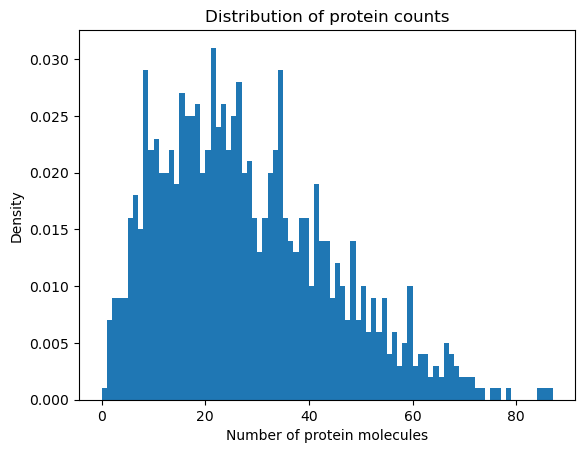

In [69]:
# Plot the results for the protein counts as a histogram
plt.hist(results, bins=range(max(results)+1), density=True)
plt.xlabel('Number of protein molecules')
plt.ylabel('Density')
plt.title('Distribution of protein counts')
plt.show()

In [73]:
# Let's adjust our Gillespie algorithm to return the trajectories at specific time points.

def gillespie1(x0, t0, tmax, S, pars, trajectoryTimes = None):
    # If the user did not provide specific time points, we will use the default
    if trajectoryTimes is None:
        trajectoryTimes = np.linspace(t0, tmax, 20)
    
    # Initialize the time and the state
    t = t0
    x = x0
     
    # Initialize the output
    states = np.zeros((len(trajectoryTimes), len(x0)))

    # next time index
    nextTimeIndex = 0

    # Run the simulation
    while t < tmax:
        # Compute the time of the next reaction
        tau = next_time(x, t, pars)
        t += tau
        
        # Check to see if we need to save the state
        while t >= trajectoryTimes[nextTimeIndex]:
            states[nextTimeIndex] = x
            nextTimeIndex += 1
            if nextTimeIndex >= len(trajectoryTimes):
                return states
        
        # Compute the index of the next reaction
        i = next_reaction(x, t, pars)

        # Update the state
        x = x + S[:, i]

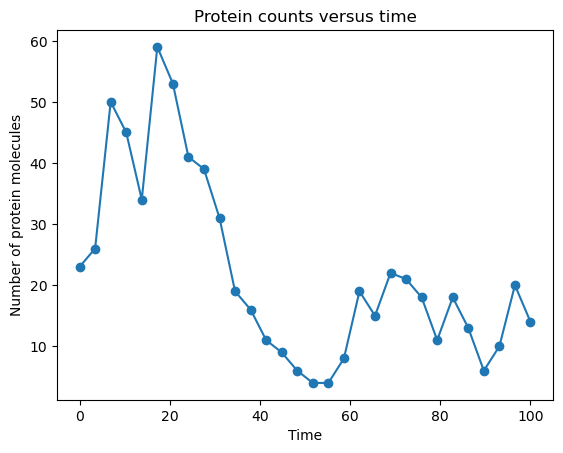

In [76]:
# Let's run the newer Gillespie algorithm and plot the results for protein counts versus time.
tmax = 100
trajectoryTimes = np.linspace(0, tmax, 30)
states = gillespie1(x0, 0, tmax, S, pars, trajectoryTimes)

# Plot the results for the protein counts
plt.plot(trajectoryTimes, states[:, 2], marker='o')
plt.xlabel('Time')
plt.ylabel('Number of protein molecules')
plt.title('Protein counts versus time')
plt.show()


{'kon': 0.2, 'koff': 0.5, 'kP': 10, 'gam': 0.1}


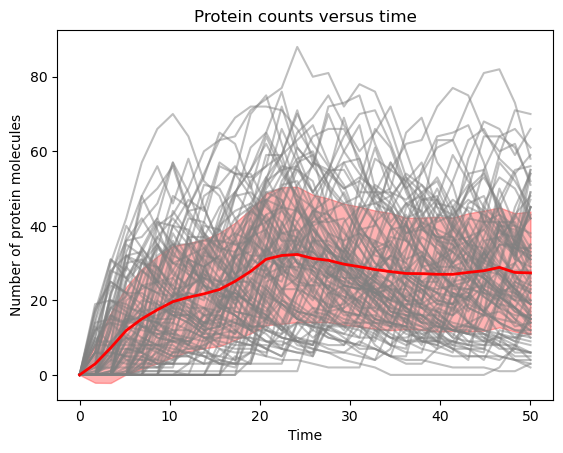

In [81]:
# Now, let's run the newer Gillespie algorithm multiple times and plot the results for protein counts
# all on the same plot.  We will also plot the mean and standard deviation of the protein counts.

print(pars)
x0 = np.array([1, 0, 0])
ntraj = 100
tmax = 50
trajectoryTimes = np.linspace(0, tmax, 30)

# Initialize the results
results = np.zeros((ntraj, len(trajectoryTimes)))
for i in range(ntraj):
    results[i] = gillespie1(x0, 0, tmax, S, pars, trajectoryTimes)[:, 2]

# Plot the results for the protein counts
plt.plot(trajectoryTimes, results.T, color='gray', alpha=0.5)
plt.plot(trajectoryTimes, np.mean(results, axis=0), color='r', linewidth=2)
plt.fill_between(trajectoryTimes, np.mean(results, axis=0) - np.std(results, axis=0), np.mean(results, axis=0) + np.std(results, axis=0), color='r', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Number of protein molecules')
plt.title('Protein counts versus time')
plt.show()



Some analysis of the SSA results:

**Tasks:**

*   Calculate the standard deviation and variance in mRNA count from all SSA trajectories.
- Calculate the Fano factor, which is the ratio of the variance and the mean of the mRNA copy number. The Fano factor quantifies the deviation from Poisson statistics.






24.2


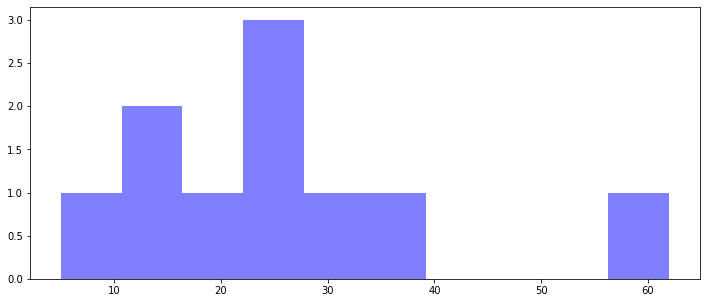

In [ ]:
# Determine the mean mRNA from all SSA trajectories:
mean_mrna_ssa = np.mean(R,axis =1)
print(mean_mrna_ssa[-1])

# To look at the mRNA distribution at different times,
# we can plot a histogram for all SSA trajectories at a given time point.
# For this, we use the function "hist" from matplotlib.
selected_time_point = 98 #@param {type:"slider", min:0, max:100, step:1}
plt.figure(figsize=(12,5))
plt.hist(R[selected_time_point,:], color ='blue',alpha=0.5)
plt.show()

# Determine the mRNA standard deviation and variance:




Compare the SSA results for mRNA Copy Number to the ODE (deterministic) solution:


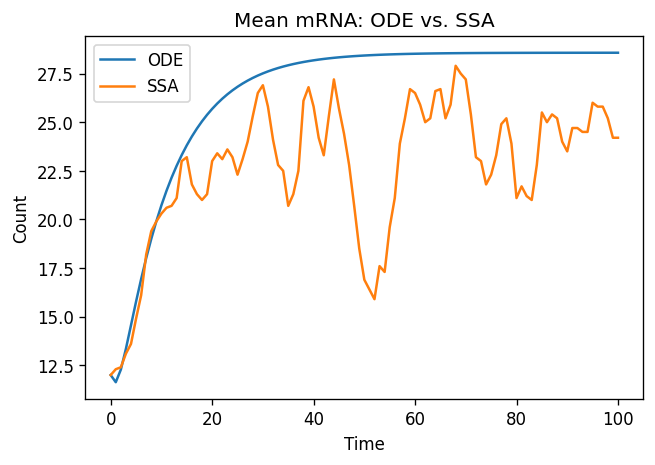

In [ ]:
#ODE model of 2 state bursting gene expression
def Gene_Model(X,t,pars = Pars):

    # Model Parameters (k_on, k_off, k_mrna, k_mrna_decay)
    k_on,k_off,k_R,gamma = Pars

#Set of ODEs that describe 2-state bursting gene expression with transcription
    dxdt = [k_off*X[1]-k_on*X[0], # OFF state ODE (State 1)
            k_on*X[0]-k_off*X[1], # ON state ODE (State 2)
            k_R*X[1]-gamma*X[2]] #in out of RNA
    return dxdt

# Solve the ODEs for the system
x0 = np.array([1,0,12])
Pars = [k_on,k_off,k_R,gamma]
ODE_soln = odeint(Gene_Model,x0,t,args=tuple([Pars,]))
mRNA_ode = ODE_soln[:,2]  # Specify the mRNA results from solving the ODE

# Plot the mean mRNA count from the SSAs compared to the ODE solution
plt.figure(dpi=120)
plt.plot(t,mRNA_ode);
plt.plot(t,mean_mrna_ssa)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Mean mRNA: ODE vs. SSA')
plt.legend(['ODE','SSA'])

**Question:**
*   How would you show that the stochasticity of the SSA projection is matching the ODE?
*   Create a graph to show this.

  * (Space to answer all questions are given at the end of the notebook, **Q7**)

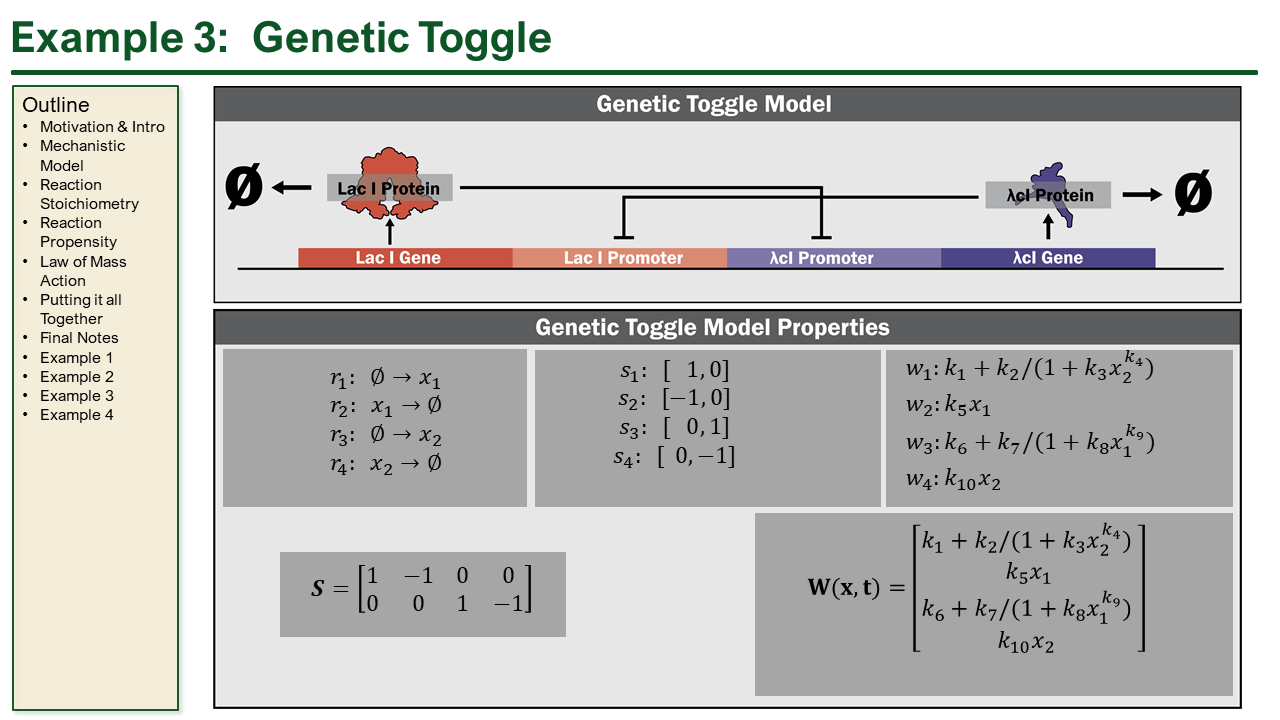

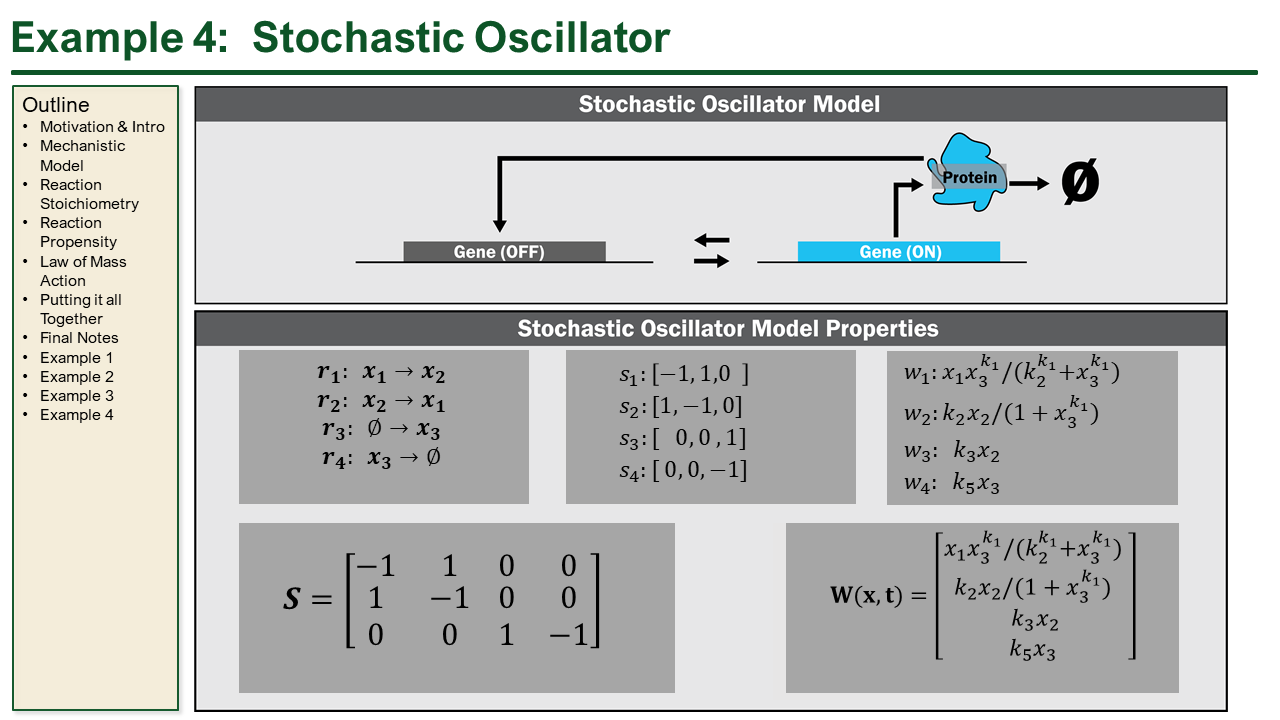


**Additional Exercises:** **Q8**

- Modify the stoichiometry matrix and propensity functions for the other example models provided.
    - Example 1: Birth/Decay Model
    - Example 3: Genetic Toggle
    - Example 4: Stochastic Oscillator
- Run the SSA for each of these example models. How do the results differ from the 2-state bursting gene model?
- In linear models, the mean level behavior is the exact same as the deterministic model but this isn't true for non-linear models. What would happen in the cases where the propensity function is concave/convex?

 -   Write a code to formulate and simulate a one species stochastic system with a convex (e.g., $k*x^2/(M+x)$) production rate propensity function and one with a convex propensity function (e.g., $k*\sqrt{x}$) production rate propensity function. Plot the average of multiple SSA trajectories of both cases on separate graphs and compare each to its ODE approximation.  Try different values for $k$ and $M$ and comment on the differences between the SSA mean and the ODE.




# Notebook Study Questions

Please enter your answers for each of the following questions by adding text or code to fill in the blanks.  For the more advanced questions, you may need to do some calculations or create a graph or figure.

##Stochastic Simmulations - Workbook Completion Requirements:##
To obtain credit for this lesson, each student should complete the blanks for questions Q1-Q8.

To obtain a certificate for the course, you must complete a minimum of five notebooks from Modules 1-4 (please note that preliminary notebooks from Module 0 will not be accepted) and submit them together via email before August 15, 2022. Please submit your completed notebooks to qbio_summer_school@colostate.edu

# Easy Questions:

  **Q1)** Rank the following in order of least to most variation relative to the mean expected behavior (i.e., lowest to highest Fano factor).
* the number of active genes in a cell,
* the number of mRNA in a cell,
* the number of mature protein in a cell.


In [ ]:
print('XXX' + ' would have the highest relative variation') # Edit to show your answers
print('XXX' + ' would have the middle relative variation')
print('XXX' + ' would have the lowest relative variation')

XXX would have the highest relative variation
XXX would have the middle relative variation
XXX would have the lowest relative variation


* **Q2)** Change the code below to solve the simpler 1-species pure birth/decay model (i.e., the Poisson Process). Add a plot of the mRNA trajectory over time.  Can you calculate an analytical expression for the steady state mean over time? Add a line for that ODE approximation.

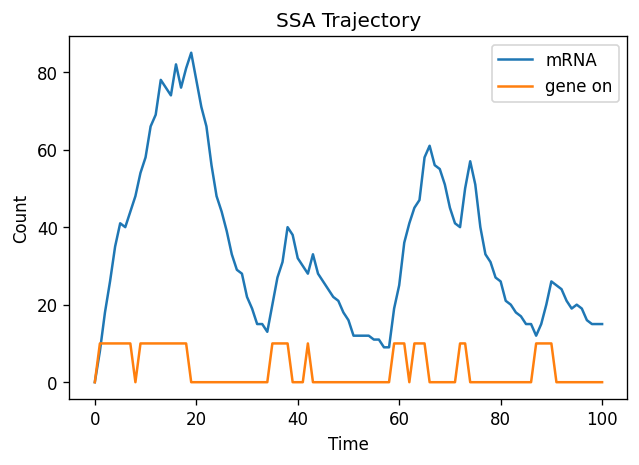

In [ ]:
# Vector of Times
t = np.linspace(0, 100, 101)

# Model Parameters (k_on, k_off, k_mrna, k_mrna_decay)
Pars = np.array([0.2,0.5,10,0.1])
k_on,k_off,k_R,gamma = Pars

# Vector of Initial Conditions (OFF,ON,R)
X = np.array([1,0,0], dtype=int)   # OFF = X[0], ON = X[1], R = X[2]

# Stoichiometry Matrix -- must be transposed (flipped)
# Species:    OFF,ON,mRNA
S = np.array([[-1, 1, 0],     # Rxn 1: OFF --> ON
              [1, -1, 0],     # Rxn 2: ON --> OFF
              [0, 0, 1],      # Rxn 3: ON --> ON + mRNA  (mRNA synthesis)
              [0, 0, -1]]).T  # Rxn 4: mRNA --> phi  (mRNA decay)

# Propensity Functions (anonymous function)
W = lambda X: np.array([[k_on*X[0]],  # Pars[0]*X[0]
              [k_off*X[1]],           # Pars[1]*X[1]
              [k_R*X[1]],          # Pars[2]*X[1]
              [gamma*X[2]]]).T   # Pars[3]*X[2]

# Run the SSA for a single trajectory
off, on, mRNA = SSA_traj(S, W, X, t)

# Plot the counts from the SSA
plt.figure(dpi=120)
plt.plot(mRNA);
plt.plot(on*10);
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('SSA Trajectory')
plt.legend(['mRNA', 'gene on'])

* **Q3)** Change the code below to add protein production and degradation to this model? Update the codes and make a plot of the trajectories for the number of active genes, the number of mRNA, and the number of protein.



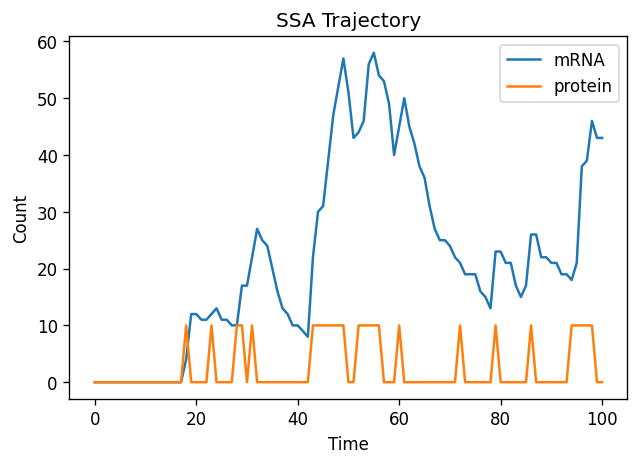

In [ ]:
# Vector of Times
t = np.linspace(0, 100, 101)

# Model Parameters (k_on, k_off, k_mrna, k_mrna_decay)
Pars = np.array([0.2,0.5,10,0.1])
k_on,k_off,k_R,gamma = Pars

# Vector of Initial Conditions (OFF,ON,R)
X = np.array([1,0,0], dtype=int)   # OFF = X[0], ON = X[1], R = X[2]

# Stoichiometry Matrix -- must be transposed (flipped)
# Species:    OFF,ON,mRNA
S = np.array([[-1, 1, 0],     # Rxn 1: OFF --> ON
              [1, -1, 0],     # Rxn 2: ON --> OFF
              [0, 0, 1],      # Rxn 3: ON --> ON + mRNA  (mRNA synthesis)
              [0, 0, -1]]).T  # Rxn 4: mRNA --> phi  (mRNA decay)

# Propensity Functions (anonymous function)
W = lambda X: np.array([[k_on*X[0]],  # Pars[0]*X[0]
              [k_off*X[1]],           # Pars[1]*X[1]
              [k_R*X[1]],          # Pars[2]*X[1]
              [gamma*X[2]]]).T   # Pars[3]*X[2]

# Run the SSA for a single trajectory
off, on, mRNA = SSA_traj(S, W, X, t)

# Plot the counts from the SSA
plt.figure(dpi=120)
plt.plot(mRNA);
plt.plot(on*10);
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('SSA Trajectory')
plt.legend(['mRNA', 'protein'])

* __Q4__ Make another figure that shows the relative fluctuations (e.g., x(t)/mean(x)) for each of the number of active genes, the number of mRNA, and the number of protein.  Comment on how well this matches your what you expectated in Q1.  See if you can change the parameters so that the relative variation is about the same for all species.

In [ ]:
# Write your own code to make these figures.  You should reuse the data calculated from above.

# Medium Questions:



In [ ]:
#@markdown  * **Q5)** Given the state ($\mathbf{x}$) and a set of propensity functions $\mathbf{w}(\mathbf{x}$):
#@markdown What is the probability mass function for the reaction numer of the next event?
#@markdown What is the probability density function for when the next reaction will occur?
#@markdown What is the probability that no reaction will occur before time $t$?
#@markdown Adjust the code to calculate these answers.

W = lambda X: np.array([[k_on*X[0]],  # Pars[0]*X[0]
              [k_off*X[1]],           # Pars[1]*X[1]
              [k_R*X[1]],          # Pars[2]*X[1]
              [gamma*X[2]]]).T   # Pars[3]*X[2]

X = np.array([5,3,4], dtype=int)

t = 1.4

PMF_n = np.array([1.,1.,1.,1.])  # Replace with code to calculated the PMF for the next reaction.

PDF_t = 0.34



*   **Q6)** Consider the bursting gene model from above. How could you adjust the parameters {k_on, k_off, k, and gamma} so that the average time between bursts is 2 minutes, the average burst lasts for 0.5 minutes, the average mRNA count during a burst is 20, and bursts decay with a half life of 0.25 minutes after turning off?  

In [ ]:
t_off = 2
t_on = 0.5
h_burst = 20.
tau_decay = 0.25
# Copy and adjust the bursting mRNA model to match these observations.  Make a figure that shows a long trajectory of ~30minutes


*   **Q7)** Write some code that create a graph to compare the average of 1000 SSA simulations to the solution of the matching the ODE analysis? Show that these are very similar when the propensity functions are all linear.

In [ ]:
# Write your code here to answer Q7



#More Involved Questions

**Q8)** Modify the stoichiometry matrix and propensity functions for the other example models provided.

    - Example 1: Birth/Decay Model
    - Example 2: Genetic Toggle
    - Example 3: Stochastic Oscillator

-Run the SSA for each of these example models. How do the results differ from the 2-state bursting gene model?

In [ ]:
##################### Example 1 #####################

# Model Parameters (k_on, k_off, k_mrna, k_mrna_decay)
Pars = np.array([0.2,0.5,10,0.1])
k_on,k_off,k_R,gamma = Pars

# Vector of Initial Conditions (OFF,ON,R)
X = np.array([1,0,0], dtype=int)   # OFF = X[0], ON = X[1], R = X[2]

# Stoichiometry Matrix -- must be transposed (flipped)
# Species:    OFF,ON,mRNA
S = np.array([[-1, 1, 0],     # Rxn 1: OFF --> ON
              [1, -1, 0],     # Rxn 2: ON --> OFF
              [0, 0, 1],      # Rxn 3: ON --> ON + mRNA  (mRNA synthesis)
              [0, 0, -1]]).T  # Rxn 4: mRNA --> phi  (mRNA decay)

# Propensity Functions (anonymous function)
W = lambda X: np.array([[k_on*X[0]],  # Pars[0]*X[0]
              [k_off*X[1]],           # Pars[1]*X[1]
              [k_R*X[1]],          # Pars[2]*X[1]
              [gamma*X[2]]]).T   # Pars[3]*X[2]

# Run the SSA for a single trajectory
off, on, mRNA = SSA_traj(S, W, X, t)

# Plot the counts from the SSA
plt.figure(dpi=120)
plt.plot(mRNA);
plt.plot(on*10);
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('SSA Trajectory')
plt.legend(['mRNA', 'protein'])

TypeError: ignored

In [ ]:
##################### Example 2 #####################

# Model Parameters (k_on, k_off, k_mrna, k_mrna_decay)
Pars = np.array([0.2,0.5,10,0.1])
k_on,k_off,k_R,gamma = Pars

# Vector of Initial Conditions (OFF,ON,R)
X = np.array([1,0,0], dtype=int)   # OFF = X[0], ON = X[1], R = X[2]

# Stoichiometry Matrix -- must be transposed (flipped)
# Species:    OFF,ON,mRNA
S = np.array([[-1, 1, 0],     # Rxn 1: OFF --> ON
              [1, -1, 0],     # Rxn 2: ON --> OFF
              [0, 0, 1],      # Rxn 3: ON --> ON + mRNA  (mRNA synthesis)
              [0, 0, -1]]).T  # Rxn 4: mRNA --> phi  (mRNA decay)

# Propensity Functions (anonymous function)
W = lambda X: np.array([[k_on*X[0]],  # Pars[0]*X[0]
              [k_off*X[1]],           # Pars[1]*X[1]
              [k_R*X[1]],          # Pars[2]*X[1]
              [gamma*X[2]]]).T   # Pars[3]*X[2]

# Run the SSA for a single trajectory
off, on, mRNA = SSA_traj(S, W, X, t)

# Plot the counts from the SSA
plt.figure(dpi=120)
plt.plot(mRNA);
plt.plot(on*10);
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('SSA Trajectory')
plt.legend(['mRNA', 'protein'])

In [ ]:
##################### Example 3 #####################

# Model Parameters (k_on, k_off, k_mrna, k_mrna_decay)
Pars = np.array([0.2,0.5,10,0.1])
k_on,k_off,k_R,gamma = Pars

# Vector of Initial Conditions (OFF,ON,R)
X = np.array([1,0,0], dtype=int)   # OFF = X[0], ON = X[1], R = X[2]

# Stoichiometry Matrix -- must be transposed (flipped)
# Species:    OFF,ON,mRNA
S = np.array([[-1, 1, 0],     # Rxn 1: OFF --> ON
              [1, -1, 0],     # Rxn 2: ON --> OFF
              [0, 0, 1],      # Rxn 3: ON --> ON + mRNA  (mRNA synthesis)
              [0, 0, -1]]).T  # Rxn 4: mRNA --> phi  (mRNA decay)

# Propensity Functions (anonymous function)
W = lambda X: np.array([[k_on*X[0]],  # Pars[0]*X[0]
              [k_off*X[1]],           # Pars[1]*X[1]
              [k_R*X[1]],          # Pars[2]*X[1]
              [gamma*X[2]]]).T   # Pars[3]*X[2]

# Run the SSA for a single trajectory
off, on, mRNA = SSA_traj(S, W, X, t)

# Plot the counts from the SSA
plt.figure(dpi=120)
plt.plot(mRNA);
plt.plot(on*10);
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('SSA Trajectory')
plt.legend(['mRNA', 'protein'])

- **Q9)** In linear models, the mean level behavior is the exact same as the deterministic model but this isn't true for non-linear models. What would happen in the cases where the propensity function is concave/convex? Write your answer below in the text box.

In [ ]:
 #@markdown Write a code to formulate and simulate a one species stochastic system with a convex (e.g., $k*x^2/(M+x)$) production rate propensity function and one with a convex propensity function (e.g., $k*\sqrt{x}$) production rate propensity function. Plot the average of multiple SSA trajectories of both cases on separate graphs and compare each to its ODE approximation.  Try different values for $k$ and $M$ and comment on the differences between the SSA mean and the ODE.
